# AI Job Market Analysis - Salary Prediction with Model Testing
This notebook builds and evaluates machine learning models to predict AI job salaries. We split data into training and testing sets, apply models, and analyze performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')
df = pd.read_csv('ai_job_dataset.csv')

In [2]:
# Preprocessing for modeling
df['experience_level'] = df['experience_level'].astype('category').cat.codes
df['employment_type'] = df['employment_type'].astype('category').cat.codes
df['company_size'] = df['company_size'].astype('category').cat.codes
X = df[['experience_level', 'employment_type', 'company_size', 'remote_ratio', 'job_description_length', 'benefits_score']]
y = df['salary_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
# Evaluate models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f'{name} Performance:')
    print(f'R2 Score: {r2_score(y_true, y_pred):.2f}')
    print(f'Mean Squared Error: {mean_squared_error(y_true, y_pred):,.2f}\n')

evaluate_model('Linear Regression', y_test, lr_pred)
evaluate_model('Random Forest', y_test, rf_pred)

Linear Regression Performance:
R2 Score: 0.04
Mean Squared Error: 3,507,425,784.87

Random Forest Performance:
R2 Score: 0.59
Mean Squared Error: 1,510,830,273.96



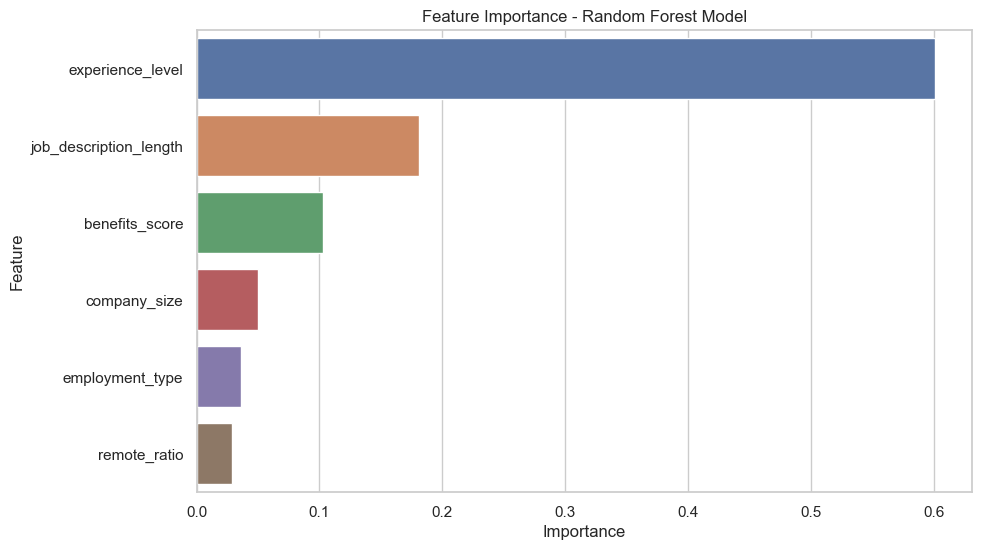

In [5]:
# Feature importance from Random Forest
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest Model')
plt.show()